# Données et fonction utilisé dans le TME

    Dans cette partie. Il y aura differentes fonctions qui nous ont permis de faire le TME
    
    Analyse contrefactel va prendre en entree l'exemple genere, le point d'origine , la liste des features et des parametres pour gerer l'affichage. elle va calculer la distance, la parcimonie ainsi que les changements qu'il y a eu entre l'entre les differentes dimensions par rapport à l'exempled de base 
    
        Intervalle plot va juste plot les points en fonction des classes generes par le classifieur mis en parametre
    
    Intervalle plot v2 va faire comme Intervalle plot mais vas en plus generer la frontiere de décision
    
    données et plot vont juste servir à generer les datasets et à les visualiser 
    
    Nous avons essaye de rajouter un histogramme normalisé en plus mais ça n'a pas marche. Les traces du codes ont été commenté sur les differentes fonctions pour laisser une trace de cette tentative

In [1]:
import numpy as np 
import sklearn as sk
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.svm import LinearSVC
from sklearn.datasets import load_wine
import random



In [2]:
def analyse_contrefactel(exemple,x,liste_feature,figsize,save_pdf=False):
    feature_modifie=[]
    difference_modifie=[]
    parcimonie=0
    for i in range(len(exemple)): # on va comparer le nombre de dimension qui ont été modifie
        if exemple[i]!=x[i]:
            parcimonie+=1
            feature_modifie.append(liste_feature[i])
            difference_modifie.append((exemple[i]-x[i]))
    plt.figure(figsize=(figsize))   # création de l'histogramme 
    x, y = difference_modifie, feature_modifie
    plt.bar(y, x)
    distance=np.linalg.norm(exemple-x) 
    if save_pdf==True: # création d'un pdf si demande
        plt.savefig("myImagePDFnonnormalisé.pdf", format="pdf", bbox_inches="tight")
    plt.title("histogramme non normalise")
    plt.show()
    
    #for i in range(len(difference_modifie)):
       # difference_modifie[i]=difference_modifie[i]/(Xmax[i]-Xmin[i])
    #plt.figure(figsize=(figsize))   
    #x, y = difference_modifie, feature_modifie
    #plt.bar(y, x)
    distance=np.linalg.norm(exemple-x) # calcul de la distance
   # if save_pdf==True:
        #plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    #plt.title("histogramme normalise")
    #plt.show()
    # affichage des resultats
    print("feature modifie",feature_modifie)
    print("valeur des modifications ",difference_modifie)


    #print("valeur des modifications avec normalisation",difference_modifie)
    print("distance = ",distance)
    print("parcimonie = ",parcimonie)
    print("nombre de parametre ",len(exemple))

In [3]:
#def moyenne_parametre(Xtrain):
    #x =np.amax(Xtrain, axis=0)
   # x2=np.amin(Xtrain, axis=0)
   # return x,x2

In [4]:
def intervalleplotv2(x1,x2,y,maxi,mini,a):# permet de plot les points dans un intervalle preci mini-maxi
    # creation du contourf qui va generer la frontieres
    x_min, x_max =x1.min() - 1, x1.max() + 1
    y_min, y_max = x2.min() - 1, x2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max,),np.arange(y_min, y_max,))            
    Z=a.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,)
    plt.xticks((x_min,x_max))
    plt.yticks((y_min,y_max))
    # on plot au dessus du contourf les points mis en entrée
    for n in range(len(x1)):
        if y[n]==0:
            plt.scatter(x1[n],x2[n],c='blue')
        else:
            plt.scatter(x1[n],x2[n],c='red')
    plt.xticks((maxi,mini))
    plt.yticks((maxi,mini))
    plt.title("ensemble des points sample et extrapolation de la frontiere de décision")
    plt.show()


In [5]:
def intervalleplot(x,y,maxi,mini,iteration):# permet de plot les points dans un intervalle preci mini-maxi
    # On plot les points mis en entré
    for n in range(len(x)):
        if y[n]==0:
            plt.scatter(x[n][0],x[n][1],c='blue')# classe 0
        else:
            plt.scatter(x[n][0],x[n][1],c='red')# classe 1
    plt.xticks((maxi,mini))# fixe les intervalles du plot
    plt.yticks((maxi,mini))
    plt.title("iteration "+str(iteration))


    plt.show()




In [6]:
def données(noises):# créer les données
    return make_moons(n_samples=1000,noise=noises)
    

In [7]:
#x,y=données(0)# creation des données
#x2,y2=données(0.1)
#x3,y3=données(0.2)
x4,y4=données(0.3)



In [8]:
def plot(x,y):# plot les données en fonction des classes
    for n in range(len(x)):
        if y[n]==0:
            plt.scatter(x[n][0],x[n][1],c='blue')
        else:
            plt.scatter(x[n][0],x[n][1],c='red')
    plt.show()




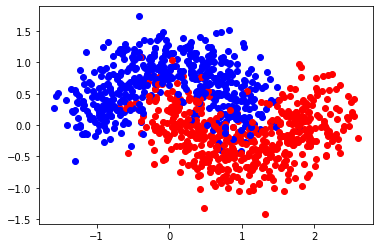

In [9]:
#plot(x,y)# generation des differents jeux de données
#plot(x2,y2)
#plot(x3,y3)
plot(x4,y4)

# Modele de classifieur

Dans cette partie, nous allons split nos dataset et créer 3 classes de classifieurs different. Pour des raisons de clarté, on a garde que ceux entraine avec le plus de bruit mais tout est commenté si on veux utiliser les jeux de données moins bruite. 

In [10]:
def train_test(x,y):# split le dataset en train et test 
    v=int(len(x)*0.7)
    trainx,testx=x[:v,:], x[v:,:]
    trainy,testy=y[:v], y[v:]
    return trainx,testx,trainy,testy

In [11]:
#trainx,testx,trainy,testy=train_test(x,y)
#trainx2,testx2,trainy2,testy2=train_test(x2,y2)
#trainx3,testx3,trainy3,testy3=train_test(x3,y3)
trainx4,testx4,trainy4,testy4=train_test(x4,y4)
#xXmax,Xmin=moyenne_parametre(trainx4)
#print("Xmax",Xmax)
#print("Xmin",Xmin)

In [12]:
def Randomforest(trainx,trainy,testx,testy):# chaque fonction créer un classifieur, l'entraine le test et le renvoit avec le resultat
    clf = RandomForestClassifier()
    clf.fit(trainx, trainy)
    a=clf.predict(testx)
    return a , clf

def SVM(trainx,trainy,testx,testy):
    clf =LinearSVC()
    clf.fit(trainx, trainy)
    a=clf.predict(testx)
    return a ,clf

def KNN(trainx,trainy,testx,testy):
    clf = KNeighborsClassifier()
    clf.fit(trainx, trainy)
    a=clf.predict(testx)
    return a ,clf

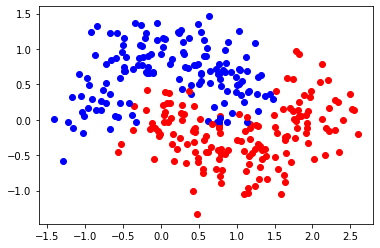

In [13]:
#a, RF1=Randomforest(trainx,trainy,testx,testy)# création des randomforest
#a2, RF2=Randomforest(trainx2,trainy2,testx2,testy2)
#a3, RF3=Randomforest(trainx3,trainy3,testx3,testy3)
a4, RF4=Randomforest(trainx4,trainy4,testx4,testy4)
#plot(testx,a)
#plot(testx2,a2)
#plot(testx3,a3)
plot(testx4,a4)


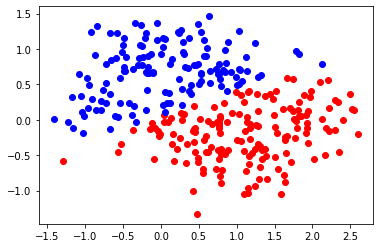

In [14]:
#a, SVM1=SVM(trainx,trainy,testx,testy)# création des SVM
#a2,SVM2=SVM(trainx2,trainy2,testx2,testy2)
#a3,SVM3=SVM(trainx3,trainy3,testx3,testy3)
a4,SVM4=SVM(trainx4,trainy4,testx4,testy4)
#plot(testx,a)
#plot(testx2,a2)
#plot(testx3,a3)
plot(testx4,a4)

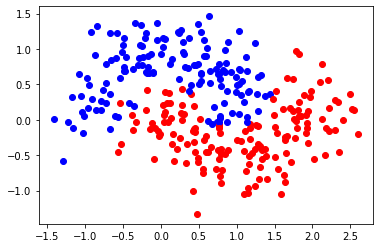

In [15]:
#a, KNN1=KNN(trainx,trainy,testx,testy)# création des KNN
#a2, KNN2=KNN(trainx2,trainy2,testx2,testy2)
#a3, KNN3=KNN(trainx3,trainy3,testx3,testy3)
a4, KNN4=KNN(trainx4,trainy4,testx4,testy4)
#plot(testx,a)
#plot(testx2,a2)
#plot(testx3,a3)
plot(testx4,a4)

# Implementation de Growing sphere

     Dans cette partie, nous allons generer toutes les fonctions necessaires à l'implementation growing sphere
     
     point sphere va generer un ensemble n de points circulaire autour d'un rayon r autour d'un point x
     SL va appeler nrayon fois pointsphere pour echantillonner different cercle à des distances contenu dans l'intervalle a0 a a1
     
     Growing sphere va generer le contre factuel et extrapoler une frontiere de décision avec l'ensemble des points samplé pour generer l'exemple renvoyé
     
     Apres cela, on va generer des points avec les 3 classifieurs et faire des mesures de distances, de parcimonies sur l'exemple contre factuel generé 

In [16]:
def pointsphere(x,r,n):# echantillone sur une sphere x= le centre, r= rayon n=nb de points
    dimension=len(x)# on recupere la shape
    point=np.random.normal(size=(n,dimension))# tirage 
    point=point/np.linalg.norm(point,axis=1).reshape((-1,1))*r+x# application de la formule
    return point#renvoie une liste de point

def SL(x,a0,a1,nrayon,point):# x= point, a0-a1= intervalle,nrayon= nb de cercle, point= nb de points par tirage
    a=np.abs((a1-a0)/nrayon)# création de l'intervale pour generer les rayons
    #b=np.empty()
    #print(b)
    a1=a0
    a1=a1+a
    z=pointsphere(x,a1,point)# creation du premier echantillon
    for i in range(nrayon-1): # creation des nrayon-1 echantillonage restant 
        a1=a1+a
        v=pointsphere(x,a1,point)
        z=np.concatenate((z,v))
        
    return z# renvoie une liste de point

In [17]:
# generation de l'exemple
indice=random.randint(0, len(x4))
xtest=x4[indice]# valeur test
ytest=y4[indice]
print(xtest)
print(ytest)

[ 1.59646869 -0.42478066]
1


In [18]:
#b=SL(xtest,0,10,10,20)# test de SL
#plt.scatter(b[:,0],b[:,1])
#plt.scatter(xtest[0],xtest[1],color='red')

In [19]:
def Growingsphres(classif,mu,n,x,y):
    #premiere iteration de la premiere boucle 
    Z=SL(x,0,mu,10,n)
    iteration=0
    Zglobal=Z
    YZ=classif.predict(Z)
    YZglobal=YZ
    intervalleplot(Z,YZ,2,-2,iteration)
    if y==0:# exist est la classe opposé à y ( pour les plots et les titres des figures)
        exist=1
    if y==1:
        exist=0
    #print(exist)
    while exist in YZ:
        iteration+=1
        mu=mu/2 # dimintion de mu 
        Z=SL(x,0,mu,10,n)
        YZ=classif.predict(Z)
        #print(YZ)
        #print(mu)
        Zglobal=np.concatenate((Zglobal,Z))# creation d'un liste regroupant tout les points generes pour la frontiere
        YZglobal=np.concatenate((YZglobal,YZ))

        intervalleplot(Z,YZ,2,-2,iteration)# plot de l'iteration



    #print(YZ)
    #print("finis")
    #print(YZ)
    a0=mu
    a1=2*mu
    iteration=0
    print("partie 2 de l'algoritme")
    while not(exist) in YZ:
        iteration+=1
        a0=mu
        a1=a1+mu
        Z=SL(x,a0,a1,10,n)
        YZ=classif.predict(Z)
        Zglobal=np.concatenate((Zglobal,Z))# creation d'un liste regroupant tout les points generes pour la frontiere
        YZglobal=np.concatenate((YZglobal,YZ))
        intervalleplot(Z,YZ,2,-2,iteration)# plot de l'iteration

        #print(YZ)
    
    intervalleplotv2(Zglobal[:,0],Zglobal[:,1],YZglobal,2,-2,classif)# plot avec la frontiere de décision
    



    mini=10e10
    ind=10e10
    # calcul du points retourné en fonction de la distance
    for i in range(len(Z)):
        if YZ[i]==exist:
            dist = np.linalg.norm(Z[i]-x) 
        #print(dist)
            if dist<mini:
                mini=dist
                ind=i
    # plot du points avec le points d'origine
    if exist==1:
        plt.scatter(Z[ind][0],Z[ind][1],c='red')
        plt.scatter(x[0],x[1],c='blue')
        plt.xticks((2,-2))
        plt.yticks((2,-2))
        plt.title("distance du controle factuel (rouge) par rapport à l'exemple de base (bleu)")


    else:
        plt.scatter(Z[ind][0],Z[ind][1],c='blue')
        plt.scatter(x[0],x[1],c='red')
        plt.xticks((2,-2))
        plt.yticks((2,-2))
        plt.title("distance du controle factuel (bleu) par rapport à l'exemple de base (rouge)")

    plt.show()


    return Z[i]# retourne le point 
    

In [20]:
#afficher le control factuel avec le point de base 

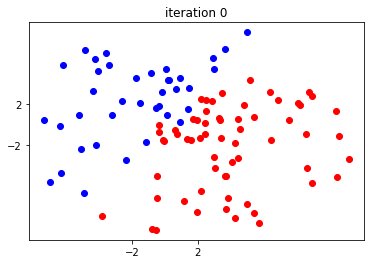

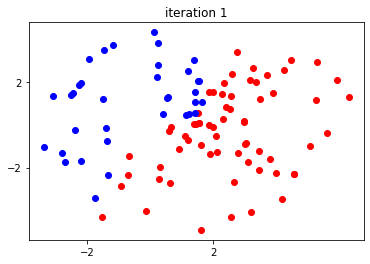

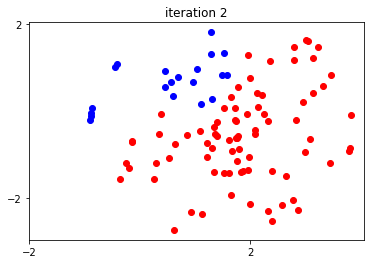

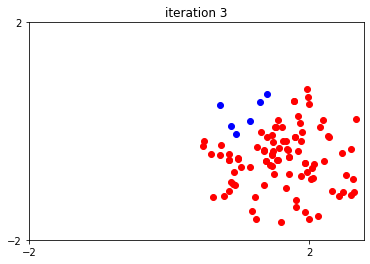

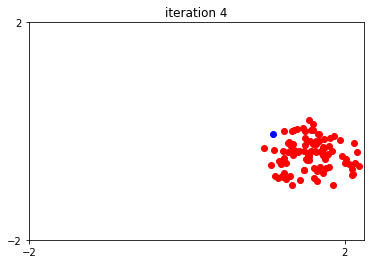

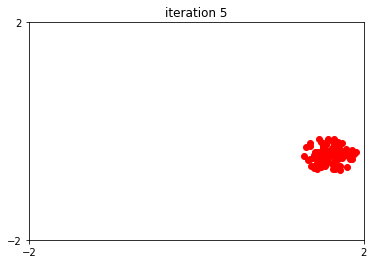

partie 2 de l'algoritme


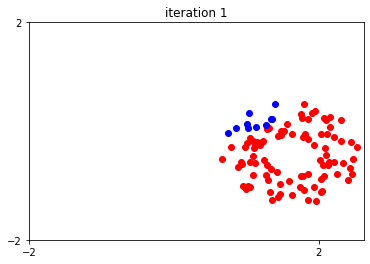

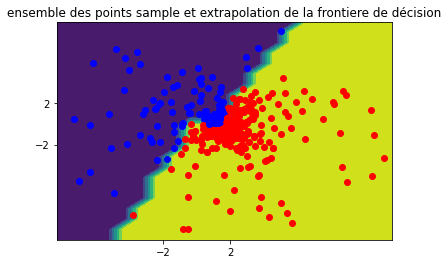

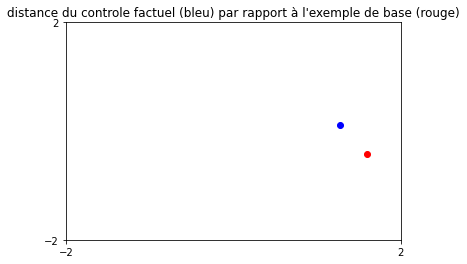

In [22]:
pointKNN=Growingsphres(KNN4,10,10,xtest,ytest)# test sur un KNN

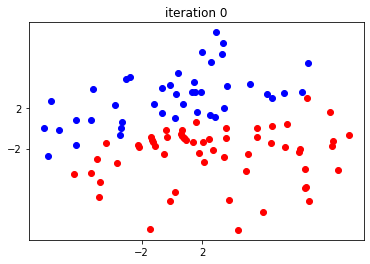

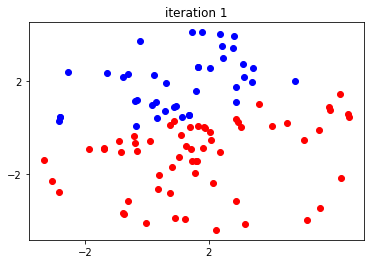

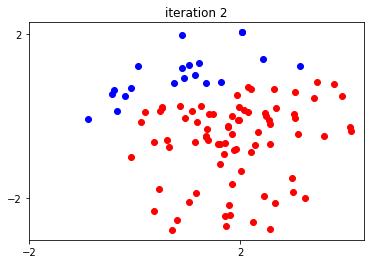

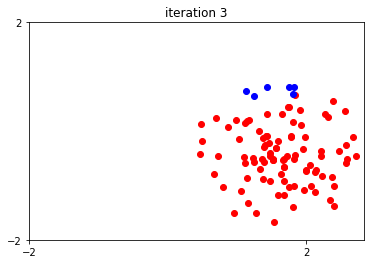

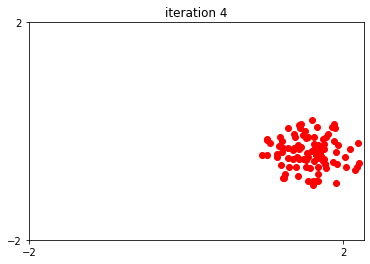

partie 2 de l'algoritme


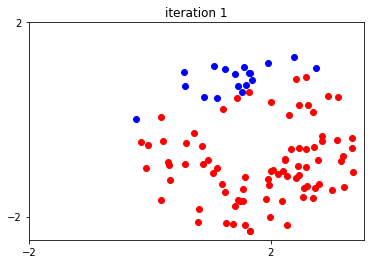

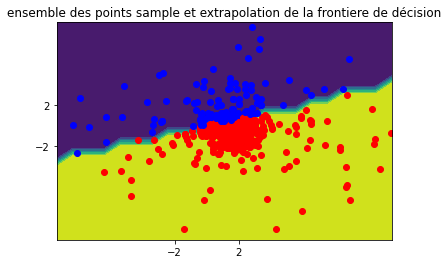

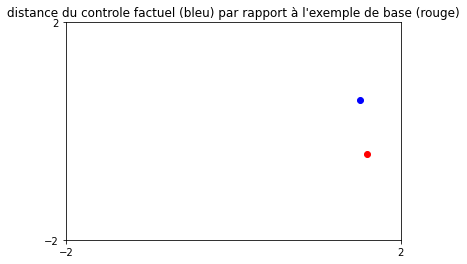

In [23]:
pointSVM=Growingsphres(SVM4,10,10,xtest,ytest)# test sur un SVM

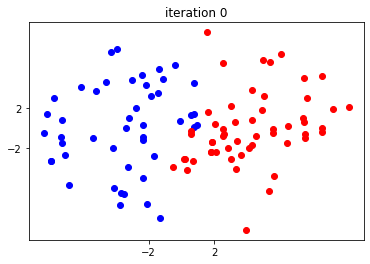

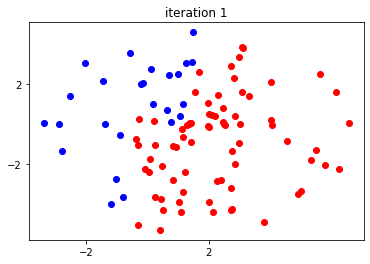

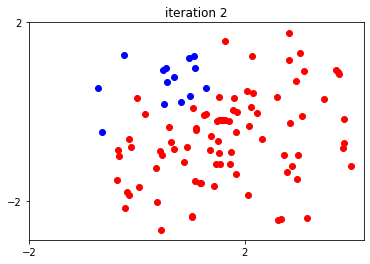

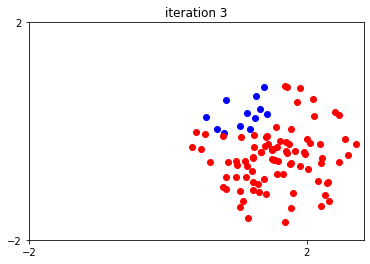

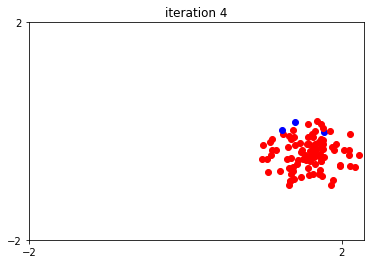

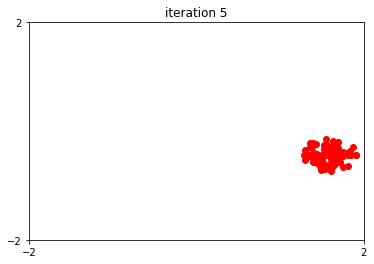

partie 2 de l'algoritme


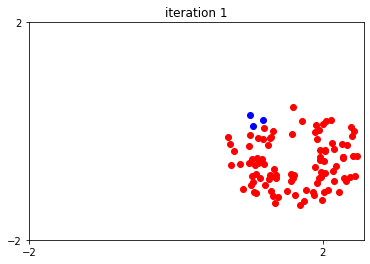

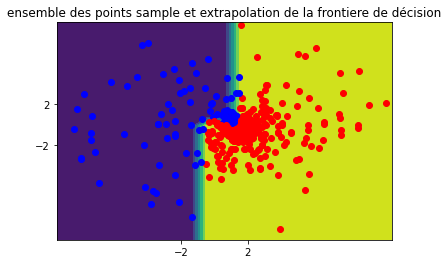

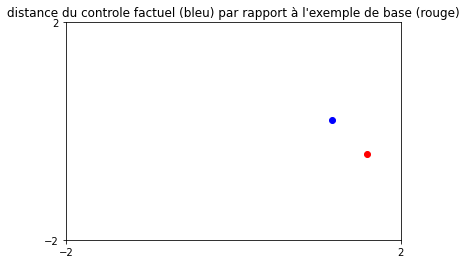

In [24]:
pointRF=Growingsphres(RF4,10,10,xtest,ytest)# test sur un RandomForest

resultat du KNN 
 


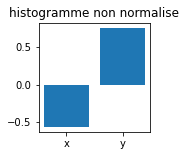

feature modifie ['x', 'y']
valeur des modifications  [-0.5601556538757337, 0.7517525480043612]
distance =  1.652014187251082
parcimonie =  2
nombre de parametre  2
resultat du SVM 



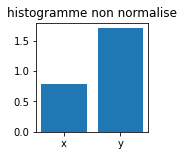

feature modifie ['x', 'y']
valeur des modifications  [0.7820607576646907, 1.704114424362675]
distance =  1.6520141872510818
parcimonie =  2
nombre de parametre  2
resultat du Random forest 



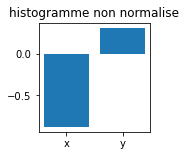

feature modifie ['x', 'y']
valeur des modifications  [-0.8813067308553371, 0.31969469208774537]
distance =  1.652014187251082
parcimonie =  2
nombre de parametre  2


In [25]:
# analyse du resultat pour les differents classifieurs
print("resultat du KNN \n ")
analyse_contrefactel(pointKNN,xtest,["x","y"],(2,2))
print("resultat du SVM \n")
analyse_contrefactel(pointSVM,xtest,["x","y"],(2,2))
print("resultat du Random forest \n")
analyse_contrefactel(pointRF,xtest,["x","y"],(2,2))

# Dataset reel  breast_cancer

Dans cette partie, nous allons reprendre l'experience precedente mais avec un dataset reel de sklearn. Le dataset breast_cance.

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split



In [27]:
breast_cancer = datasets.load_breast_cancer()

In [28]:
X_train, X_test, y_train, y_test =train_test_split(breast_cancer["data"], breast_cancer["target"], test_size=0.25, random_state=1)
#Xmax,Xmin=moyenne_parametre(X_train)
#print(Xmax)
#print(Xmin)

In [29]:
def Growingsphres_sansplot(classif,mu,n,x,y):# growing sphere sans les plots car données multidimensionnelles. 
    Z=SL(x,0,mu,10,n)
    iteration=0
    Zglobal=Z
    YZ=classif.predict(Z)
    YZglobal=YZ

 
    if y==0:# exist est la classe opposé à y 
        exist=1
    if y==1:
        exist=0
    #print(exist)
    while exist in YZ:
        iteration+=1
        mu=mu/2
        Z=SL(x,0,mu,10,n)
        YZ=classif.predict(Z)


        #print(YZ)
        #print(mu)
        Zglobal=np.concatenate((Zglobal,Z))
        YZglobal=np.concatenate((YZglobal,YZ))
    #print(YZ)
    #print("finis")
    #print(YZ)
    a0=mu
    a1=2*mu
    iteration=0
    while not(exist) in YZ:
        iteration+=1
        a0=mu
        a1=a1+mu
        Z=SL(x,a0,a1,10,n)
        YZ=classif.predict(Z)
        Zglobal=np.concatenate((Zglobal,Z))
        YZglobal=np.concatenate((YZglobal,YZ))

        #print(YZ)
    
    


    mini=12
    ind=1000
    for i in range(len(Z)):
        if YZ[i]==exist:
            dist = np.linalg.norm(Z[i]-x) 
        #print(dist)
            if dist<mini:
                mini=dist
                ind=i
   


    return Z[i]# retourne le point 
    

In [30]:
a, RFmulti=Randomforest(X_train,y_train, X_test, y_test)# création des randomforest



In [31]:
indice=random.randint(0, len(X_test))
x1=X_test[indice]
y1=a[indice]
#print(x1)
#print(y1)

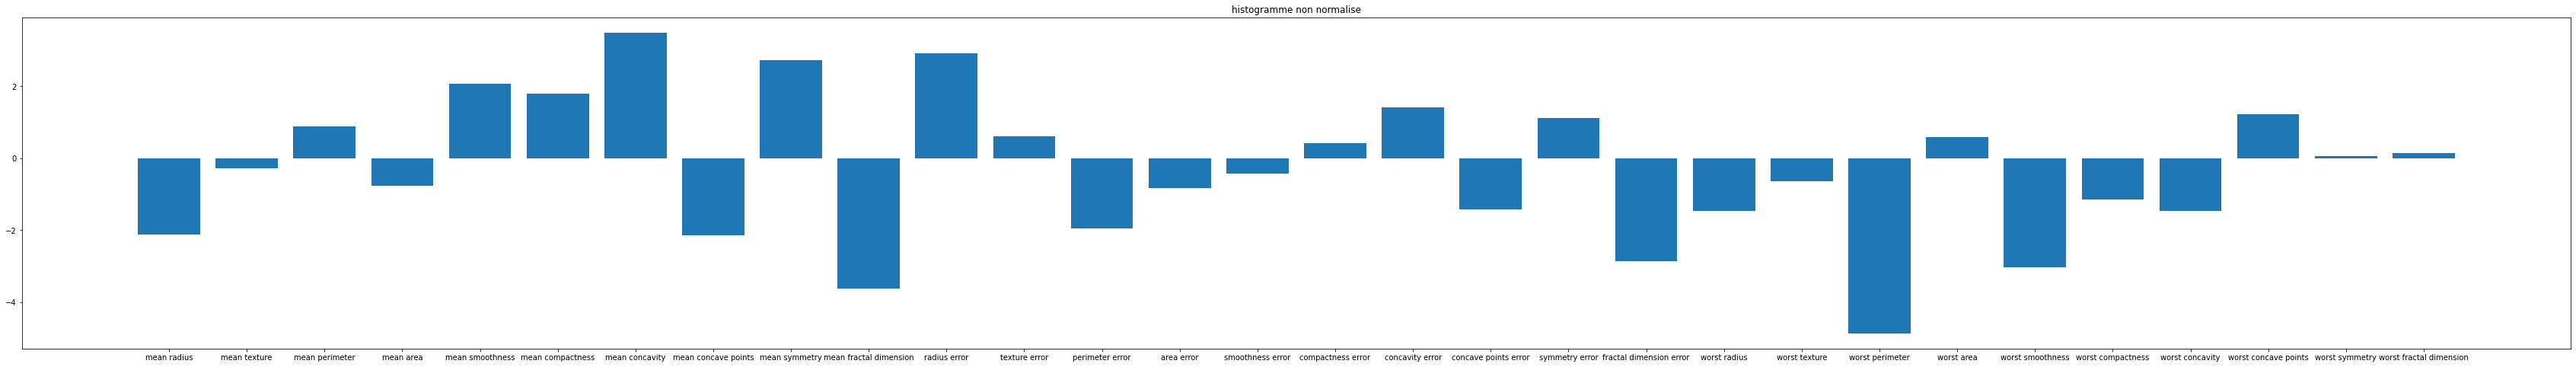

feature modifie ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
valeur des modifications  [-2.1218963447820407, -0.2805397026709979, 0.8928937136453641, -0.7604934848972107, 2.082063092764322, 1.7874017993201217, 3.499892561149239, -2.1443173906130153, 2.721299898385309, -3.6373671982412805, 2.9172977156901414, 0.6163191741066129, -1.9598788864117738, -0.8211542821923921, -0.43556097917724423, 0.4123916580519899, 1.4209491127374496, -1.4192263231986348, 1.110433057798

In [33]:
control=Growingsphres_sansplot(RFmulti,1000000000000,10,x1,y1)
#growing sphere sans les plots car données multidimensionnellesa
analyse_contrefactel(control,x1,breast_cancer.feature_names,(60,8),save_pdf=True)


# Dataset reel  Wine

Dans cette partie, nous allons reprendre l'experience precedente mais avec un dataset reel de sklearn .Le dataset Wine.

In [34]:
datawine = load_wine(as_frame=True)
print(datawine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [37]:
newy=datawine["target"]
newx=datawine["data"]
for i in range(len(datawine["target"])):
    if datawine["target"][i]==2:
        newy=newy.drop(i)
        newx=newx.drop(i)

X_train, X_test, y_train, y_test =train_test_split(newx, newy, test_size=0.25, random_state=1)
#Xmax,Xmin=moyenne_parametre(X_train)
#print(Xmax)
#print(Xmin)
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
X_train=pd.DataFrame(X_train).to_numpy()
X_test=pd.DataFrame(X_test).to_numpy()
y_train=pd.DataFrame(y_train).to_numpy()
y_test=pd.DataFrame(y_test).to_numpy()


In [38]:
a, RFmulti2=Randomforest(X_train,y_train, X_test, y_test)# création des randomforest
indice=random.randint(0, len(X_test))
x1=X_test[indice]
y1=a[indice]



/var/folders/xz/vzw73_1x4qd8h6_bhryn95mh0000gn/T/ipykernel_46021/2286567693.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainx, trainy)


[-58.16348284   2.322533   -20.60030665  24.91655654 131.34223986
 -87.61388846 -93.9190605  -53.74084181  43.25034624   9.66476333
  42.31983563  39.67751222 343.64892375]


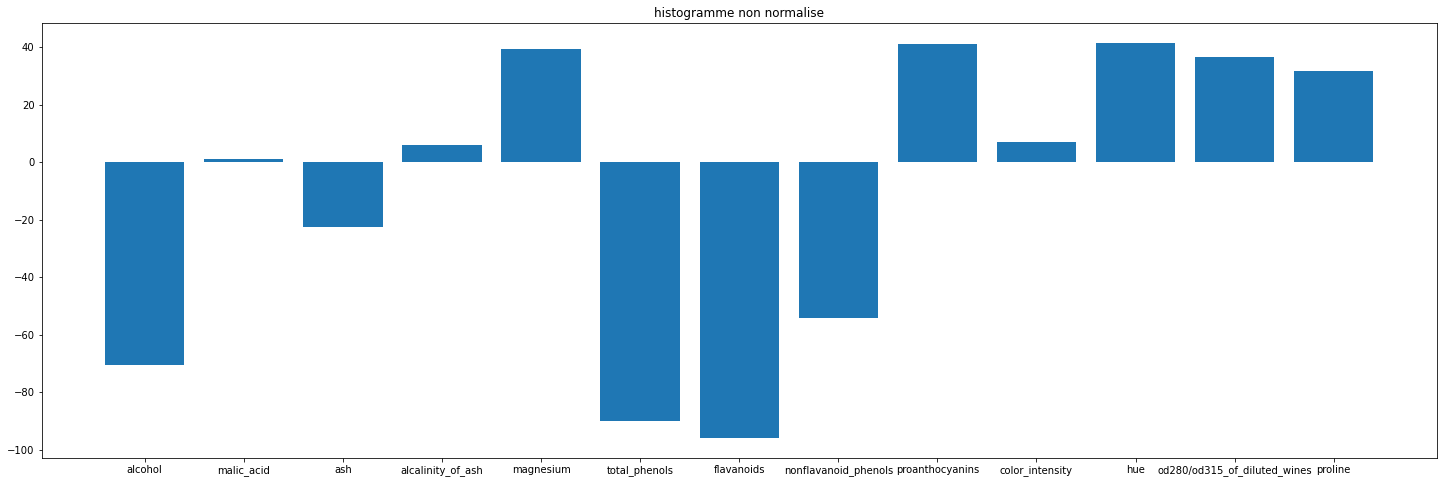

feature modifie ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
valeur des modifications  [-70.38348284354721, 1.0325330028506463, -22.54030664970646, 5.916556539963487, 39.34223986041616, -89.97388846459748, -95.95906050049676, -54.13084181428812, 41.17034624469075, 6.964763327214722, 41.45983562502188, 36.657512221345755, 31.648923751341556]
distance =  326.12132067683035
parcimonie =  13
nombre de parametre  13


In [40]:
control=Growingsphres_sansplot(RFmulti2,100000000000000,10,x1,y1)
print(control)
#growing sphere sans les plots car données multidimensionnellesa
analyse_contrefactel(control,x1,datawine.feature_names,(25,8))


# Extension de Growing sphere

    Cette partie est la partie 6 du TME 3. Elle etait plus facilement implementable avec les fonctions deja présente dans ce TME. Donc pour ne pas alourdir le TME3. Nous avons prefere le mettre dans celui la 


    On ajoute une matrice de ponderation qui represente les coeficients que l'on applique à chacune des dimensions. Si on mets des ponderations suffisament petite ou nulle aux dimension qui ne nous interesse pas. On peux exclure une des dimension de notre composante . Cependant, methodes generes des points dans des ensembles tres grand. Il est dur de generer un points avec exactement la valeur que l'on cherche ( contrairement au TME3)

In [41]:
def Growingsphresponde(classif,mu,n,x,y,ponde):
    Z=SL(x,0,mu,10,n)
    iteration=0
    Zglobal=Z
    YZ=classif.predict(Z)
    YZglobal=YZ
    intervalleplot(Z,YZ,2,-2,iteration)
 
    if y==0:# exist est la classe opposé à y 
        exist=1
    if y==1:
        exist=0
    #print(exist)
    while exist in YZ:
        iteration+=1
        mu=mu/2
        Z=SL(x,0,mu,10,n)
        YZ=classif.predict(Z)
        #print(YZ)
        #print(mu)
        Zglobal=np.concatenate((Zglobal,Z))
        YZglobal=np.concatenate((YZglobal,YZ))

        intervalleplot(Z,YZ,2,-2,iteration)



    #print(YZ)
    #print("finis")
    #print(YZ)
    a0=mu
    a1=2*mu
    iteration=0
    while not(exist) in YZ:
        iteration+=1
        a0=mu
        a1=a1+mu
        Z=SL(x,a0,a1,10,n)
        YZ=classif.predict(Z)
        Zglobal=np.concatenate((Zglobal,Z))
        YZglobal=np.concatenate((YZglobal,YZ))
        intervalleplot(Z,YZ,2,-2,iteration)

        #print(YZ)
    
    intervalleplotv2(Zglobal[:,0],Zglobal[:,1],YZglobal,2,-2,classif)
    



    mini=10e100
    ind=10e100
    for i in range(len(Z)):
        if YZ[i]==exist:
            dist=0
            for w in range(len(Z[i])):
                dist+=ponde[w]*np.linalg.norm(Z[i][w]-x[w]) 
        #print(dist)
            if dist<mini:
                mini=dist
                ind=i
    if exist==1:
        plt.scatter(Z[ind][0],Z[ind][1],c='red')
        plt.scatter(x[0],x[1],c='blue')
        plt.xticks((2,-2))
        plt.yticks((2,-2))
        plt.title("distance du controle factuel (rouge) par rapport à l'exemple de base (bleu)")
    else:
        plt.scatter(Z[ind][0],Z[ind][1],c='blue')
        plt.scatter(x[0],x[1],c='red')
        plt.xticks((2,-2))
        plt.yticks((2,-2))
        plt.title("distance du controle factuel (bleu) par rapport à l'exemple de base (rouge)")

    plt.show()


    return Z[i]# retourne le point 
    

In [42]:
martrice_ponderation=[100,0.0]



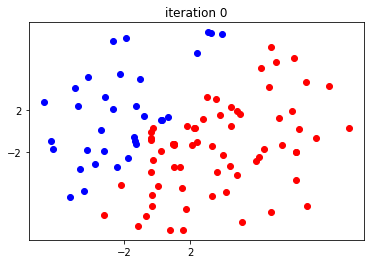

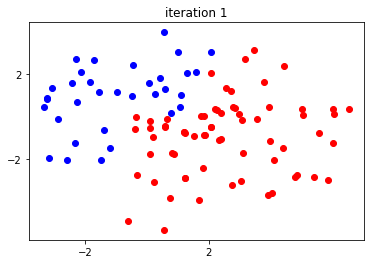

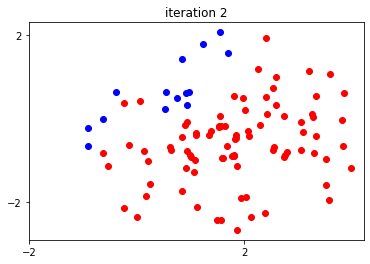

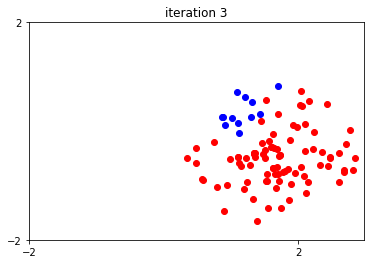

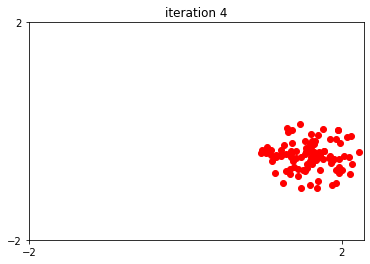

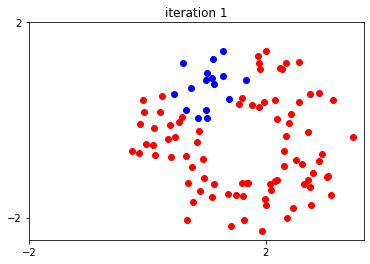

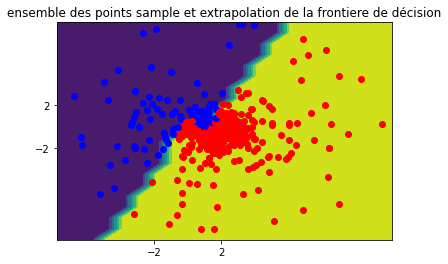

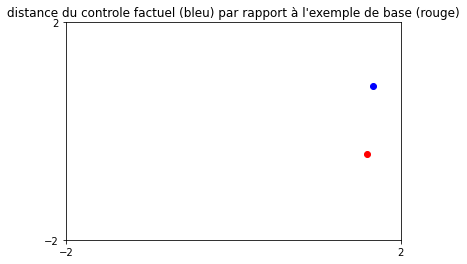

In [44]:
point=Growingsphresponde(KNN4,10,10,xtest,ytest,martrice_ponderation)# test sur un KNN

In [45]:
martrice_ponderation=[0.0000001,100,]

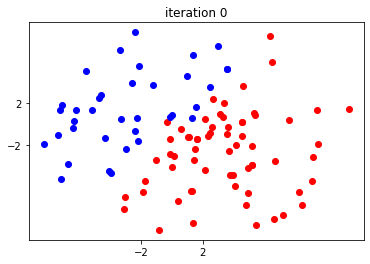

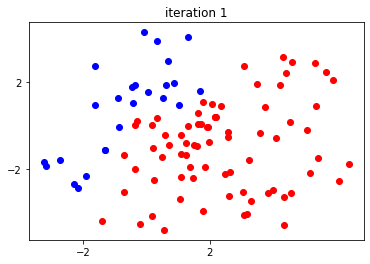

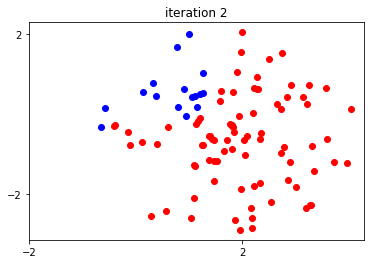

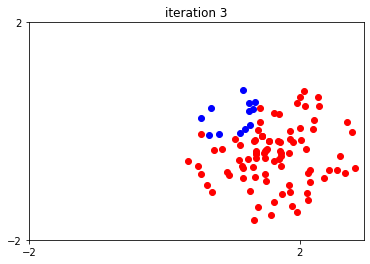

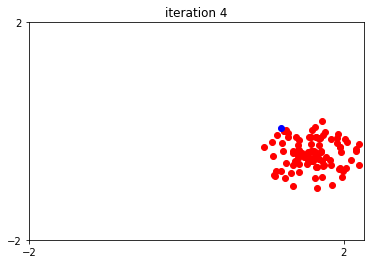

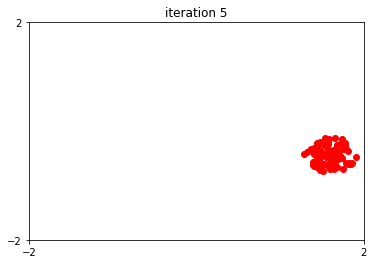

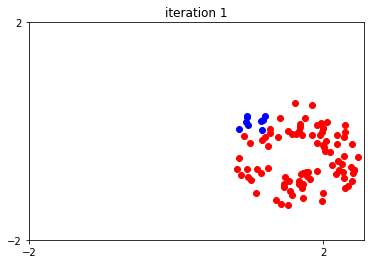

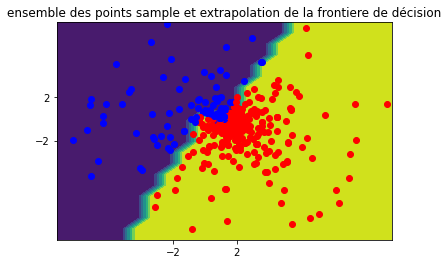

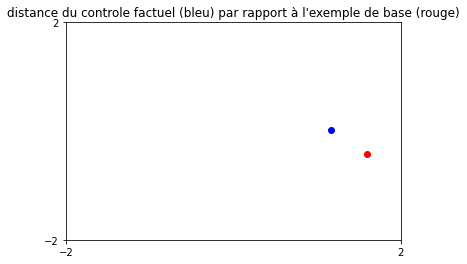

In [47]:
point=Growingsphresponde(KNN4,10,10,xtest,ytest,martrice_ponderation)# test sur un KNN